# *****youtube_channel_real_performance_analytics*****

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv(r"C:\Users\Bashar Aldeiri\Downloads\youtube_channel_real_performance_analytics.csv")

In [23]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [25]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [26]:
df=df.drop('ID' , axis=1 ,errors='ignore')
df=df.drop('Returned Items (USD)' , axis=1,errors='ignore')
df=df.drop('Unconfirmed Commissions (USD)' , axis=1,errors='ignore')
df=df.drop('DoubleClick Revenue (USD)' , axis=1,errors='ignore') 
df=df.drop('Watch Page Ads Revenue (USD)' , axis=1,errors='ignore')
df=df.drop('Reminders Set' , axis=1,errors='ignore')
df=df.drop('Chat Messages Count' , axis=1,errors='ignore')
df=df.drop('Stream Hours ' , axis=1,errors='ignore')
df=df.drop('Teaser Clicks' , axis=1,errors='ignore')
df=df.drop('Teaser Impressions' , axis=1,errors='ignore')

In [27]:
df.describe() 

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,15117.953297,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,24339.924215,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,368.500000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,5892.000000,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,19372.000000,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,141634.000000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


In [28]:
neg_rev=df[df['Estimated AdSense Revenue (USD)']<0]
neg_rev_count=neg_rev.shape[0]
neg_rev

,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)


In [29]:
#df['Date'] = pd.to_datetime(df[['Year' , 'Month' , 'Day']])

In [30]:
df.head()

,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


# *****Exploratory Data Analysis*****

# Analysis: Compare the video durations by day of the week to check for any variations.

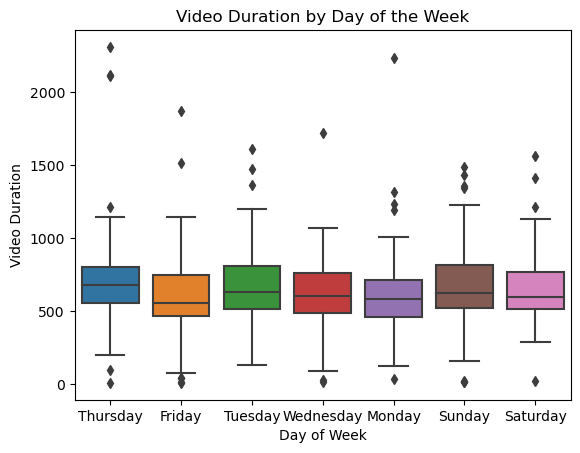

In [31]:
sns.boxplot(x='Day of Week', y='Video Duration', data=df)
plt.title("Video Duration by Day of the Week")
plt.show()


# Analysis: Investigate if there’s any relationship between the video duration and watch time.

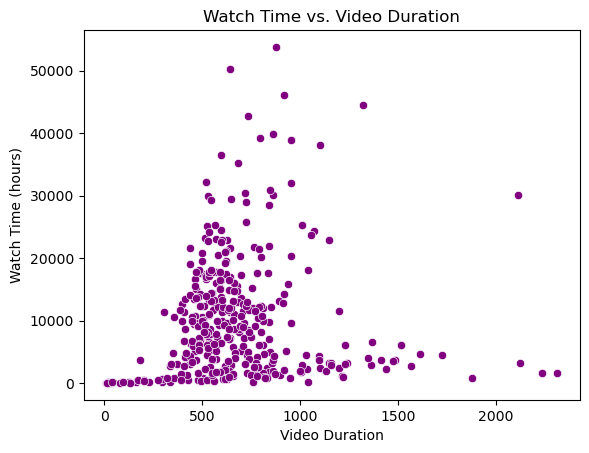

In [32]:
sns.scatterplot(x='Video Duration', y='Watch Time (hours)', color='purple', data=df)
plt.title("Watch Time vs. Video Duration")
plt.show()


# Analysis: Analyze the average estimated revenue per day.

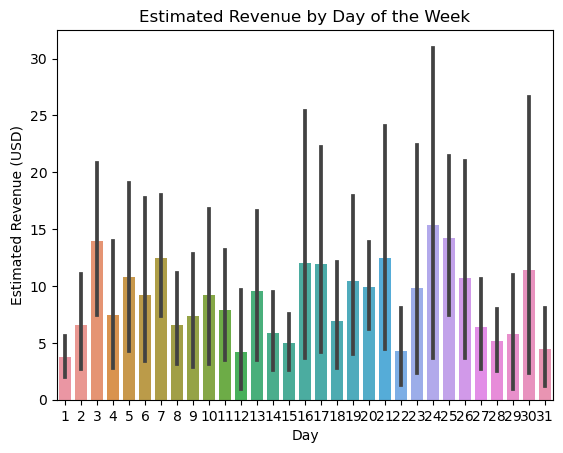

In [33]:
sns.barplot(x='Day', y='Estimated Revenue (USD)', data=df)
plt.title("Estimated Revenue by Day of the Week")
plt.show()


# Analysis: Compare average view percentage by day of the week.

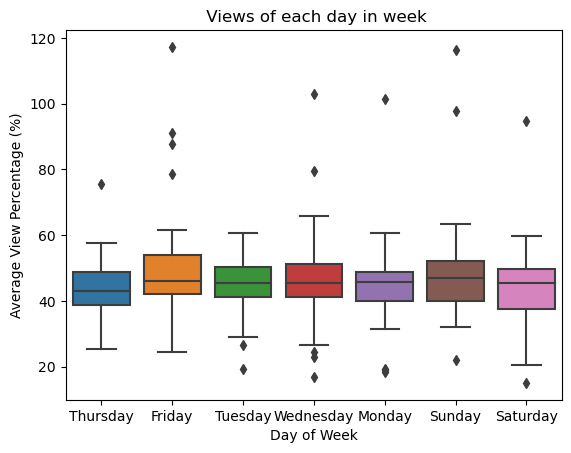

In [34]:
sns.boxplot(x='Day of Week', y='Average View Percentage (%)', data=df)
plt.title(" Views of each day in week")
plt.show()


# Analysis: Explore if longer videos tend to get more views.

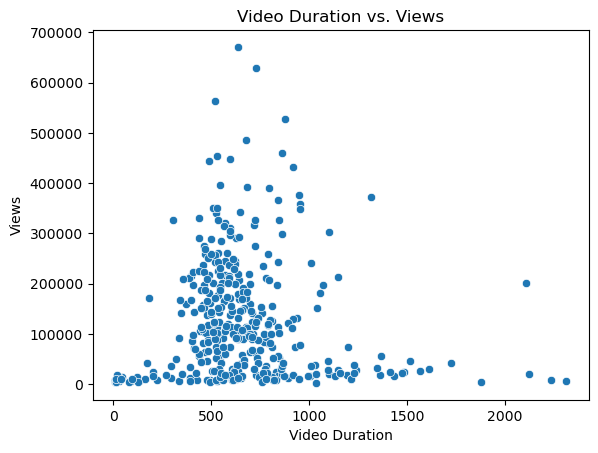

In [35]:
sns.scatterplot(x='Video Duration', y='Views', data=df)
plt.title("Video Duration vs. Views")
plt.show()


# Analysis: Investigate if more views correlate with more watch time.

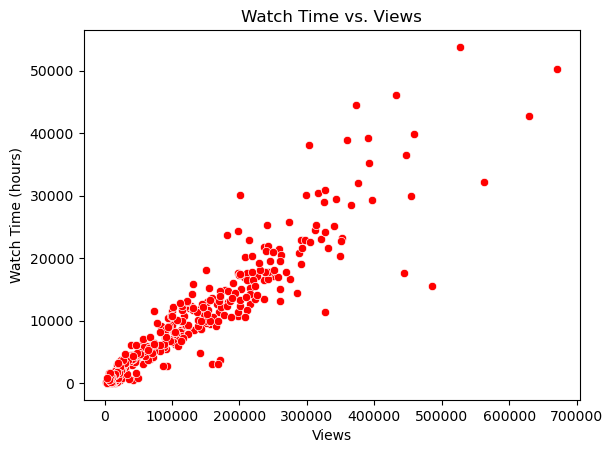

In [36]:
sns.scatterplot(x='Views', y='Watch Time (hours)' ,color='red', data=df)
plt.title("Watch Time vs. Views")
plt.show()


# Analysis: Understand the relationship between views and subscribers.

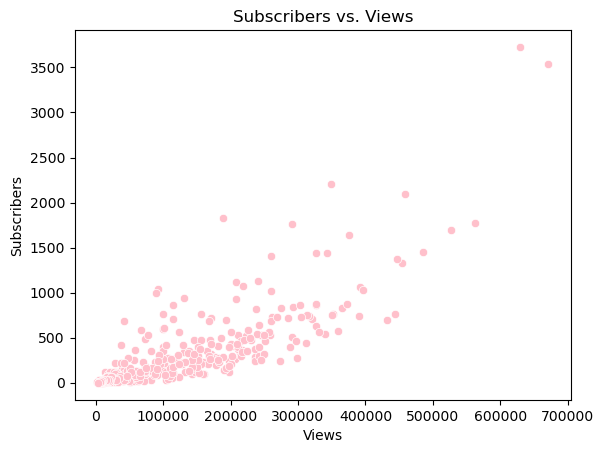

In [37]:
sns.scatterplot(x='Views', y='Subscribers',color='pink', data=df)
plt.title("Subscribers vs. Views")
plt.show()


# Analysis: Check if higher impressions lead to higher revenue per 1000 views.

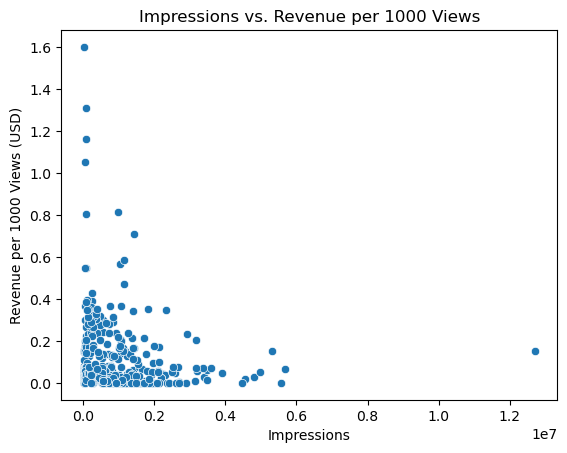

In [38]:
sns.scatterplot(x='Impressions', y='Revenue per 1000 Views (USD)', data=df)
plt.title("Impressions vs. Revenue per 1000 Views")
plt.show()


# Analysis: Compare the number of subscribers gained on each day of the week.

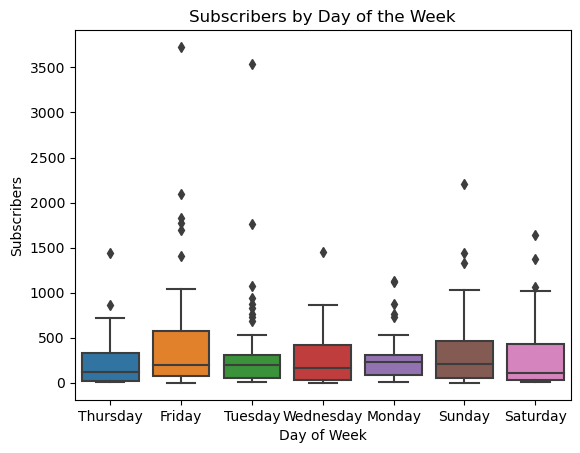

In [39]:
sns.boxplot(x='Day of Week', y='Subscribers', data=df)
plt.title("Subscribers by Day of the Week")
plt.show()


In [ ]:
df

# Date Preprocessing ----->

In [40]:
df = pd.get_dummies(df, drop_first=True)
# Normalize/Scale numerical features (use StandardScaler or MinMaxScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['Video Duration', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 
                     'Views', 'Watch Time (hours)', 'Impressions', 'Subscribers']  # Example columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Estimated Revenue (USD)'])  # assuming 'Estimated Revenue (USD)' is your target
y = df['Estimated Revenue (USD)']

# Split into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
df.head()

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Video Publish Time_2024-09-01 00:00:00,Video Publish Time_2024-09-16 00:00:00,Video Publish Time_2024-09-25 00:00:00,Video Publish Time_2024-10-18 00:00:00,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,-1.402940,0,2,6,2016,-0.492043,-0.634108,1.386,1.021,981.0,...,False,False,False,False,False,False,False,True,False,False
1,-0.827516,8,10,6,2016,-0.313692,-0.633799,1.612,1.361,861.0,...,False,False,False,False,False,False,False,False,False,False
2,-1.608881,4,14,6,2016,-0.547778,-0.684069,2.105,1.818,88.0,...,False,False,False,False,False,False,False,False,True,False
3,-1.969277,15,29,6,2016,-0.603513,-0.688548,1.667,0.857,35.0,...,False,False,False,False,False,False,False,False,False,True
4,-1.875392,2,1,7,2016,-0.625807,-0.689938,0.000,0.000,0.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
X_train

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Video Publish Time_2024-09-01 00:00:00,Video Publish Time_2024-09-16 00:00:00,Video Publish Time_2024-09-25 00:00:00,Video Publish Time_2024-10-18 00:00:00,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
210,-0.527690,8,8,7,2018,-0.625807,-0.689552,1.600,1.333,6.0,...,False,False,False,False,False,False,True,False,False,False
339,0.335445,16,28,3,2024,0.617079,-0.412101,3.178,1.878,6091.0,...,False,False,False,False,False,False,False,True,False,False
299,0.171903,8,11,3,2022,0.076452,0.348825,1.790,1.340,17976.0,...,False,False,False,False,False,False,False,False,False,False
75,-1.190942,4,20,4,2017,-0.213369,-0.590479,1.822,1.440,1630.0,...,False,False,False,False,False,False,False,True,False,False
84,-0.176379,4,17,5,2017,0.321685,-0.463761,3.239,1.531,6197.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.418663,3,8,4,2017,-0.241237,-0.657737,2.182,1.827,498.0,...,False,False,False,False,False,True,False,False,False,False
106,0.532300,2,4,7,2017,-0.207796,-0.269012,2.851,1.514,10266.0,...,False,False,False,False,False,False,False,False,True,False
270,3.206504,12,20,1,2021,0.968209,0.266663,1.617,1.162,17246.0,...,False,False,False,False,False,False,False,False,False,True
348,-0.345978,7,28,5,2024,1.347205,-0.454417,4.400,2.059,6518.0,...,False,False,False,False,False,False,False,False,True,False


In [43]:
y_train

210     0.050
339     6.840
299    14.559
75      1.298
84      5.227
        ...  
71      0.501
106     8.568
270    11.884
348     7.619
102    22.644
Name: Estimated Revenue (USD), Length: 291, dtype: float64

In [44]:
X_test

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Video Publish Time_2024-09-01 00:00:00,Video Publish Time_2024-09-16 00:00:00,Video Publish Time_2024-09-25 00:00:00,Video Publish Time_2024-10-18 00:00:00,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
193,0.795783,6,28,3,2018,-0.625807,-0.689938,0.000,0.000,0.0,...,False,False,False,False,False,False,False,False,False,True
33,1.032010,5,10,12,2016,-0.241237,-0.508394,0.815,0.584,3281.0,...,False,False,False,False,False,True,False,False,False,False
15,0.508072,11,12,10,2016,-0.458603,-0.583529,0.944,0.724,1797.0,...,False,False,False,False,False,False,False,False,False,True
347,0.611042,7,21,5,2024,1.347205,0.001335,2.890,1.856,13936.0,...,False,False,False,False,False,False,False,False,True,False
57,-1.000143,4,3,3,2017,-0.408441,0.058401,0.668,0.499,12975.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.400492,5,16,5,2018,-0.603513,-0.645151,1.555,1.383,652.0,...,False,False,False,False,False,False,False,False,False,True
82,-0.312664,2,11,5,2017,-0.224516,0.020254,1.287,1.016,11652.0,...,False,False,False,False,False,False,False,True,False,False
94,-0.830545,0,9,6,2017,-0.553352,-0.654185,1.706,1.574,502.0,...,False,False,False,False,False,False,False,False,False,False
192,0.184017,6,22,3,2018,-0.625807,-0.689938,0.000,0.000,0.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y_test

# - ML MODEL ----->

# Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0012160985212831257
R-squared: 0.9999860324992015


In [46]:
y_pred

array([ 1.72003836e-02,  1.03247556e+00,  7.07948221e-01,  1.49456091e+01,
        3.61435745e+00,  2.47346888e-01,  3.82797469e-01,  1.31468152e+01,
        7.37482702e+00,  2.46208061e+01,  2.71180862e-01,  1.79718680e-01,
        5.24761651e-01,  2.58469261e+00,  2.17736279e+01,  2.13692456e+01,
        6.36095265e-01,  1.01233449e-01,  7.19914859e+00,  5.46776733e+00,
        5.96974993e-02,  7.40394753e+00,  7.07048719e+00, -6.04357263e-02,
        6.01382578e-03,  2.20168869e+01,  7.61567632e-02,  6.42129456e-02,
        3.81840786e+00,  8.70047768e+00,  9.12887733e+00,  1.41313080e+01,
        2.33984696e+00,  5.65520521e+00,  2.67636071e+01,  6.16691191e+00,
        3.23478141e-01,  1.44278498e+00,  9.27795370e+00,  1.75895477e+00,
        2.17852076e+01,  4.25037270e+01,  4.13500128e+00,  5.64891331e-01,
        4.85151531e+00,  1.40525775e+01,  5.88280870e+00,  3.55217900e-01,
        3.13724666e-01,  1.21997541e-01,  2.59351916e+01,  2.82888190e+00,
        2.55114927e+01,  

# THANK YOU EVERYONE !! ###